# Proyek Analisis Data: E-Commerce Public Dataset


- Nama: Anto Budi Setiawan
- Email: antosetiawan441@gmail.com
- Id Dicoding: anto_budi_setiawan

# Gathering Data

Menyiapakan data yang ingin dipakai, proses ini adalah proses ektraksi data csv dari file .ZIP

In [4]:
import zipfile

path_to_zip_file = "/content/drive/MyDrive/python data analyst/dataset/E-commerce-public-dataset.zip"
directory_to_extract_to = 'dataset/'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

# Pertanyaan Analisis



1. rata-rata rating untuk setiap produk
2. Persebaran konsumen
3. kategori produk yang sering dibeli
4. Jumlah order berdasarkan state





# EDA

## Assessing Data

Melihat rangkuman setiap data csv yang ingin dianalisis untuk menentukan bagian mana yang tidak diperlukan dan cara apa yang ingin dilakukan dalam pembersihan data

In [5]:
import pandas as pd
import glob
import os

path = glob.glob(os.path.join("/content/dataset/E-Commerce Public Dataset/", "*.csv"))

for f in sorted(path):
  print(os.path.basename(f))
  df = pd.read_csv(f)
  df.info()
  print()

customers_dataset.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

geolocation_dataset.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   

Melihat nilai dari keselurahan data untuk melihat apakah ada nilai NaN atau tidak

In [6]:
import pandas as pd
import glob
import os

path = glob.glob(os.path.join("/content/dataset/E-Commerce Public Dataset/", "*.csv"))

for f in path:
  print(os.path.basename(f))
  df = pd.read_csv(f)
  print(df.isnull().sum())
  print()

product_category_name_translation.csv
product_category_name            0
product_category_name_english    0
dtype: int64

geolocation_dataset.csv
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

products_dataset.csv
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

order_payments_dataset.csv
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

customers_dataset.csv
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state       

Melihat apakah data yang digunakan memiliki baris duplikat atau tidak

In [7]:
import pandas as pd
import glob
import os

path = glob.glob(os.path.join("/content/dataset/E-Commerce Public Dataset/", "*.csv"))

for f in sorted(path):
  count = 0
  name_file = os.path.basename(f)
  df = pd.read_csv(f)
  for d in df.duplicated():
    if d:
      count += 1
  print(f"duplikasi pada dataset {name_file}: {count}")

duplikasi pada dataset customers_dataset.csv: 0
duplikasi pada dataset geolocation_dataset.csv: 261831
duplikasi pada dataset order_items_dataset.csv: 0
duplikasi pada dataset order_payments_dataset.csv: 0
duplikasi pada dataset order_reviews_dataset.csv: 0
duplikasi pada dataset orders_dataset.csv: 0
duplikasi pada dataset product_category_name_translation.csv: 0
duplikasi pada dataset products_dataset.csv: 0
duplikasi pada dataset sellers_dataset.csv: 0


## Cleaning dan Explore Data

**Bersihkan, gabungkan dan buang kolom yang tidak diperlukan**

Pada proses ini data dibersihkan dari nilai NaN, duplikasi data dan ambil kolom-kolom yang ingin dipakai untuk kebutuhan analisis

Pada baris cell ke 31 sampai baris ke 49 adalah proses penggabungan data untuk menjadikannya data utuh yang sudah diolah

Terdapat 2 fungsi utama yaitu combine dan removeNclean, dimana fungsi combine adalah menggabungkan 2 dataset menjadi 1 dataset utuh lalu untuk fungsi removeNclean bertugas sebagai pembersihan data dari nilai NaN dan pembersihan kolom yang tidak digunakan

In [8]:
import pandas as pd


# load semua dataset yang diperlukan untuk analisis data
product_dataset = pd.read_csv("/content/dataset/E-Commerce Public Dataset/products_dataset.csv")
product_category_translation = pd.read_csv("/content/dataset/E-Commerce Public Dataset/product_category_name_translation.csv")
order_dataset = pd.read_csv("/content/dataset/E-Commerce Public Dataset/orders_dataset.csv")
order_payments_dataset = pd.read_csv("/content/dataset/E-Commerce Public Dataset/order_payments_dataset.csv")
order_items_dataset = pd.read_csv("/content/dataset/E-Commerce Public Dataset/order_items_dataset.csv")
order_review = pd.read_csv("/content/dataset/E-Commerce Public Dataset/order_reviews_dataset.csv")
customers_dataset = pd.read_csv("/content/dataset/E-Commerce Public Dataset/customers_dataset.csv")

# drop kolom yang tidak digunakan dan drop nilai NaN
def removeNclean(df, kolom): # argumen kolom adalah kolom yang tidak ingin dihapus
  df = df.dropna()
  if kolom != None:
    df = df.drop(columns=[k for k in df if k not in kolom]) # hapus kolom yang tidak ada pada argumen kolom
  return df

# argumen yang diteruskan adalah sebuah list untuk setiap data yang terdiri dari dataframe dan list kolom yang ingin dipertahankan
# [df, ["kolom_1", "kolom_1" ...]]
# argumen join adalah argumen untuk cara bagaimana 2 dataframe digabungkan dan argumen on untuk kolom mana yang ingin digabungkan kedua dataset harus ada kedua nama kolom yang sama
def combine(data_1, data_2, join, on):
  # Bersihkan nilai dataset yang bernilai NaN dan hapus kolom yang tidak diperlukan untuk analisis
  df1 = removeNclean(data_1[0], data_1[1]) # teruskan sebuah list kolom yang ingin dipertahankan
  df2 = removeNclean(data_2[0], data_2[1])

  # gabungkan kedua dataset
  new_df = pd.merge(df1, df2, how=join, on=on)
  return new_df

product = combine([product_dataset, ["product_id", "product_category_name"]],
                  [product_category_translation, ["product_category_name", "product_category_name_english"]],
                  join="inner", on="product_category_name")
order_df1 = combine([order_dataset, ["order_id", "order_status", "customer_id"]],
                    [order_payments_dataset, ["order_id", "payment_sequential"]],
                    join="inner", on="order_id")
order_df2 = combine([product, ["product_id", "product_category_name_english"]],
                    [order_items_dataset, ["order_id", "product_id", "price"]],
                    join="inner", on="product_id")
items_dataset = combine([order_df2, None],
                    [order_review, ["order_id", "review_score"]],
                    join="inner", on="order_id")
customer_dataset = combine([order_df1, None],
                    [customers_dataset, ["customer_id", "customer_city", "customer_state"]],
                    join="inner", on="customer_id")

# combine semua dataset menjadi 1 dataset utuk yang sudah dibersihkan dan dibuang semua kolom yang tidak diperlukan
all_dataset = combine([items_dataset, None],
                    [customer_dataset, None],
                    join="inner", on="order_id")

all_dataset.head(10)

,product_id,product_category_name_english,order_id,price,review_score,customer_id,order_status,payment_sequential,customer_city,customer_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,e17e4f88e31525f7deef66779844ddce,10.91,5,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,1,mogi-guacu,SP
1,0d009643171aee696f4733340bc2fdd0,perfumery,7b13c77c64a9a956500cbf1a9a23798d,275.00,3,45d942b1af5529f8990f27848a40e645,delivered,1,sao paulo,SP
2,0d009643171aee696f4733340bc2fdd0,perfumery,a84a0bd528e053f6b266e21bb1111e3f,319.90,5,2a9f4bad138e972730f8289c0ea9ed74,delivered,1,cachoeiras de macacu,RJ
3,28e410092e56a080e14595c053d0bbe8,perfumery,e680246ff33f65fe221f0e11128a4778,9.90,5,f280548eca7d2b0ef9da3fc572df42ce,delivered,1,sao paulo,SP
4,28e410092e56a080e14595c053d0bbe8,perfumery,e680246ff33f65fe221f0e11128a4778,9.90,5,f280548eca7d2b0ef9da3fc572df42ce,delivered,1,sao paulo,SP
5,3488d2ce36e718097c1509444289ef7f,perfumery,098a8457920d6c63f0cb10ccfbcd369d,199.90,5,f6a623ccb7b0dac8b9c9c74594f2c041,delivered,1,sorocaba,SP
6,f159439c5c382fae366d444e05c590c1,perfumery,4dbf5de576e0e8d18ad0932e1ed8e89d,149.90,1,6585b54dd5ac7f69a3ea0b4c6d6ed130,delivered,1,sao paulo,SP
7,f159439c5c382fae366d444e05c590c1,perfumery,4dbf5de576e0e8d18ad0932e1ed8e89d,149.90,1,6585b54dd5ac7f69a3ea0b4c6d6ed130,delivered,1,sao paulo,SP
8,f159439c5c382fae366d444e05c590c1,perfumery,51439e5635af258945aeca18f5a04edb,146.99,5,45441e07ba053836a57ea85af22d56be,delivered,1,porto alegre,RS
9,f159439c5c382fae366d444e05c590c1,perfumery,b1737a1ef657350ee5e90c4035ad2aeb,146.99,5,69d4bf26c29d3e86be7ab9126b9a7e4d,delivered,1,rio de janeiro,RJ


**Rename nama yang tidak dapat dimengerti oleh manusai agar lebih sederhana dan ringkas**

Pada bagian ini yaitu mengubah nilai dari kolom cutomer_id di karenakan nilai dari kolom tersebut susah untuk dibaca sehingga dilakukan pengubahan nilai pada kolom tersebut

In [9]:
def rename_id(kolom):
  global all_dataset
  all_dataset.sort_values(kolom)
  temp = None
  new_id = 0
  s = sorted(all_dataset[kolom])
  for idx, id in enumerate(s):
    if id != temp:
      new_id += 1
    all_dataset.at[idx, kolom] = new_id
    temp = id

rename_id("customer_id")
all_dataset.sort_values("customer_id")
all_dataset.to_csv("/content/all_dataset.csv")
all_dataset.head(10)

,product_id,product_category_name_english,order_id,price,review_score,customer_id,order_status,payment_sequential,customer_city,customer_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,e17e4f88e31525f7deef66779844ddce,10.91,5,1,delivered,1,mogi-guacu,SP
1,0d009643171aee696f4733340bc2fdd0,perfumery,7b13c77c64a9a956500cbf1a9a23798d,275.00,3,1,delivered,1,sao paulo,SP
2,0d009643171aee696f4733340bc2fdd0,perfumery,a84a0bd528e053f6b266e21bb1111e3f,319.90,5,1,delivered,1,cachoeiras de macacu,RJ
3,28e410092e56a080e14595c053d0bbe8,perfumery,e680246ff33f65fe221f0e11128a4778,9.90,5,2,delivered,1,sao paulo,SP
4,28e410092e56a080e14595c053d0bbe8,perfumery,e680246ff33f65fe221f0e11128a4778,9.90,5,3,delivered,1,sao paulo,SP
5,3488d2ce36e718097c1509444289ef7f,perfumery,098a8457920d6c63f0cb10ccfbcd369d,199.90,5,4,delivered,1,sorocaba,SP
6,f159439c5c382fae366d444e05c590c1,perfumery,4dbf5de576e0e8d18ad0932e1ed8e89d,149.90,1,5,delivered,1,sao paulo,SP
7,f159439c5c382fae366d444e05c590c1,perfumery,4dbf5de576e0e8d18ad0932e1ed8e89d,149.90,1,6,delivered,1,sao paulo,SP
8,f159439c5c382fae366d444e05c590c1,perfumery,51439e5635af258945aeca18f5a04edb,146.99,5,7,delivered,1,porto alegre,RS
9,f159439c5c382fae366d444e05c590c1,perfumery,b1737a1ef657350ee5e90c4035ad2aeb,146.99,5,8,delivered,1,rio de janeiro,RJ


## Jawab pertanyaan dan visualisasi data

**Pertanyaan 1**

**rata-rata rating untuk setiap produk**

Pada proses kali ini mengelompokkan setiap kategori produk untuk menghitung nilai rata-rata review score setiap kategori produk tersebut, kemudian divisualisasikan ke dalam sebuah grafik batang

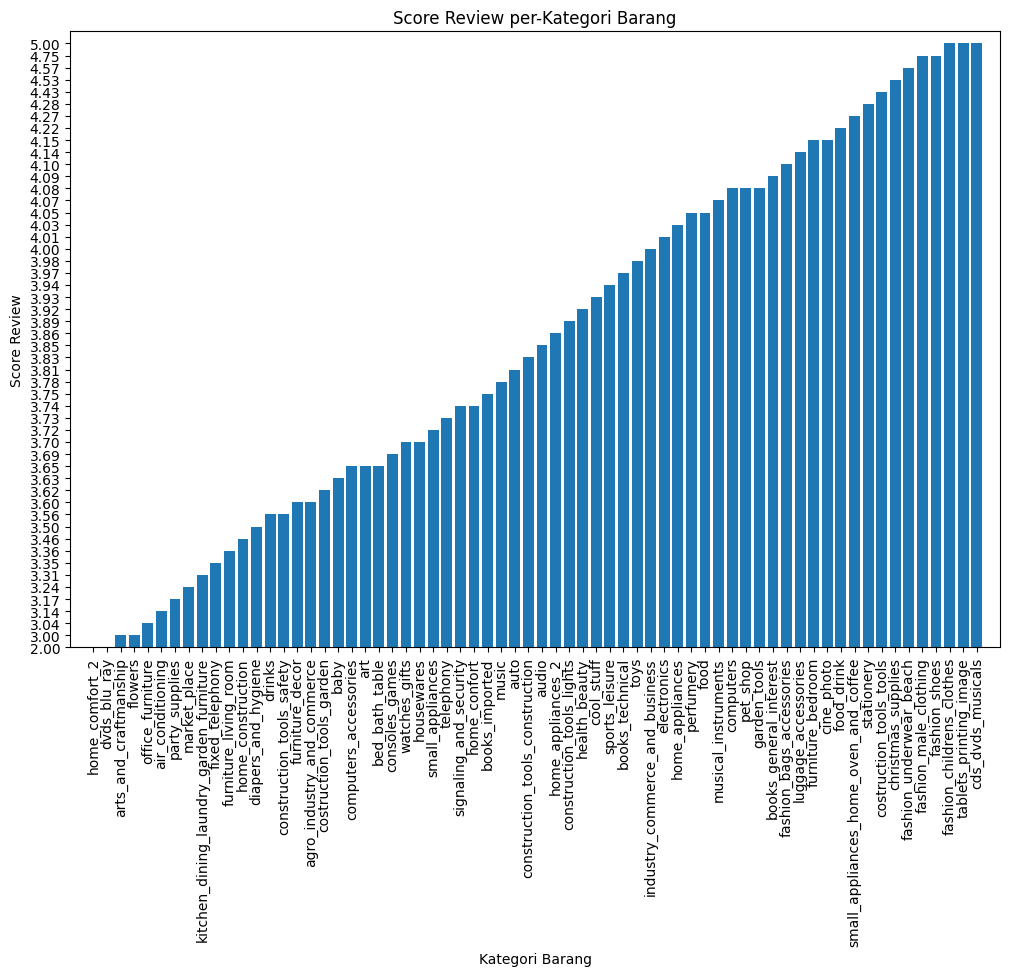

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data = all_dataset.groupby(by=["product_category_name_english"]).agg(
    {
        "review_score": "mean"
    }
)
data["review_score"] = ["{:.2f}".format(v) for v in data["review_score"]]
data = data.sort_values("review_score")

fig = plt.figure(figsize=(12, 8))
x = data.index
y = data["review_score"]

plt.bar(x, y)
plt.xlabel("Kategori Barang")
plt.ylabel("Score Review")
plt.xticks(rotation=90)
plt.title("Score Review per-Kategori Barang")
plt.margins(.02)
plt.show()

**Pertanyaan 2**

**Persebaran konsumen state**

Langkah kali ini yaitu menganalisis persebaran konsumen untuk setiap state dengan melakukan pengelompokkan pada kolom cutomer_state kemudian menghitung berapa jumlah id pelanggan, kemudian memvisualisasikan hasil temuan tersebut pada sebuah grafik batang

In [11]:
data_state = all_dataset.groupby(by="customer_state").customer_id.count()

print("customer by state")
print(data_state)

customer by state
customer_state
AC       4
AL      46
AM      20
AP      10
BA     457
CE     168
DF     255
ES     241
GO     227
MA      67
MG    1248
MS      94
MT     134
PA     135
PB      79
PE     233
PI      68
PR     506
RJ    1463
RN      74
RO      21
RR       7
RS     516
SC     373
SE      50
SP    5044
TO      38
Name: customer_id, dtype: int64


Di bawah ini merupakan cell untuk visualisasi data persebaran konsumen untuk setiap state

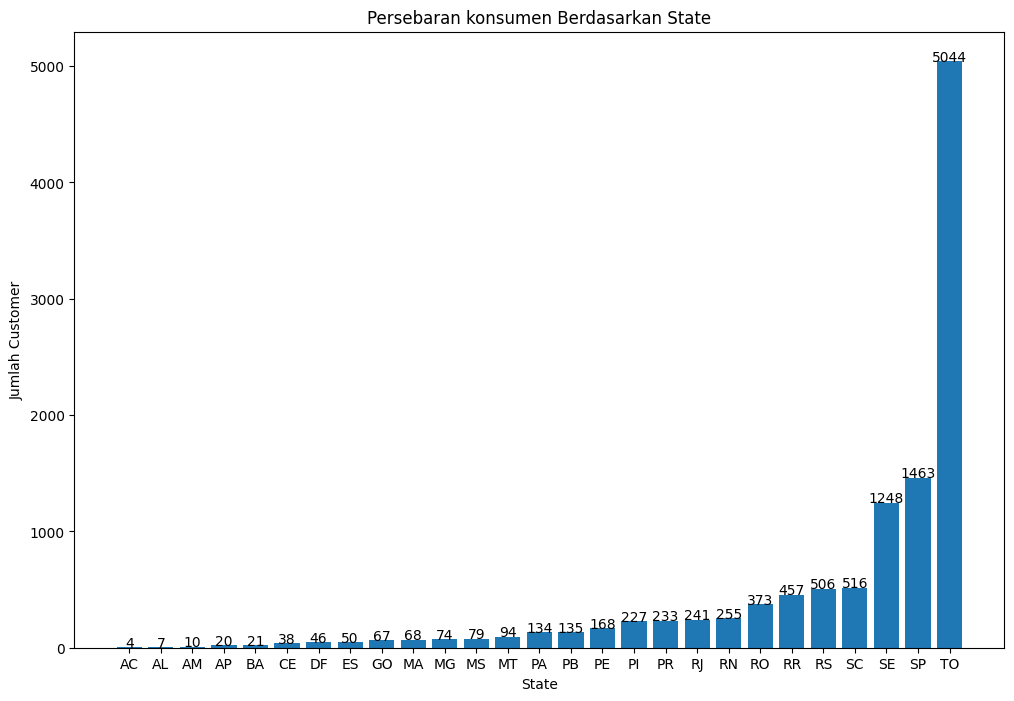

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
y = sorted(list(data_state))
x = list(data_state.index)

for i in range(len(x)):
  plt.text(i,y[i],y[i], ha = 'center')

plt.bar(x, y)
plt.title("Persebaran konsumen Berdasarkan State")
plt.xlabel("State")
plt.ylabel("Jumlah Customer")
plt.show()

**Pertanyaan 3**

**Kategori produk yang sering dibeli**

Code di bawah merupan code program untuk menganalisis setiap kategori barang yang sering dibeli atau yang paling laku dibeli dengan mengelompokkan kolom product_category_name_english, kemudian menghitung berapa jumlah pembelian pada kolom oaymen_sequential dan divisualisasikan ke dalam sebuah grafik batang

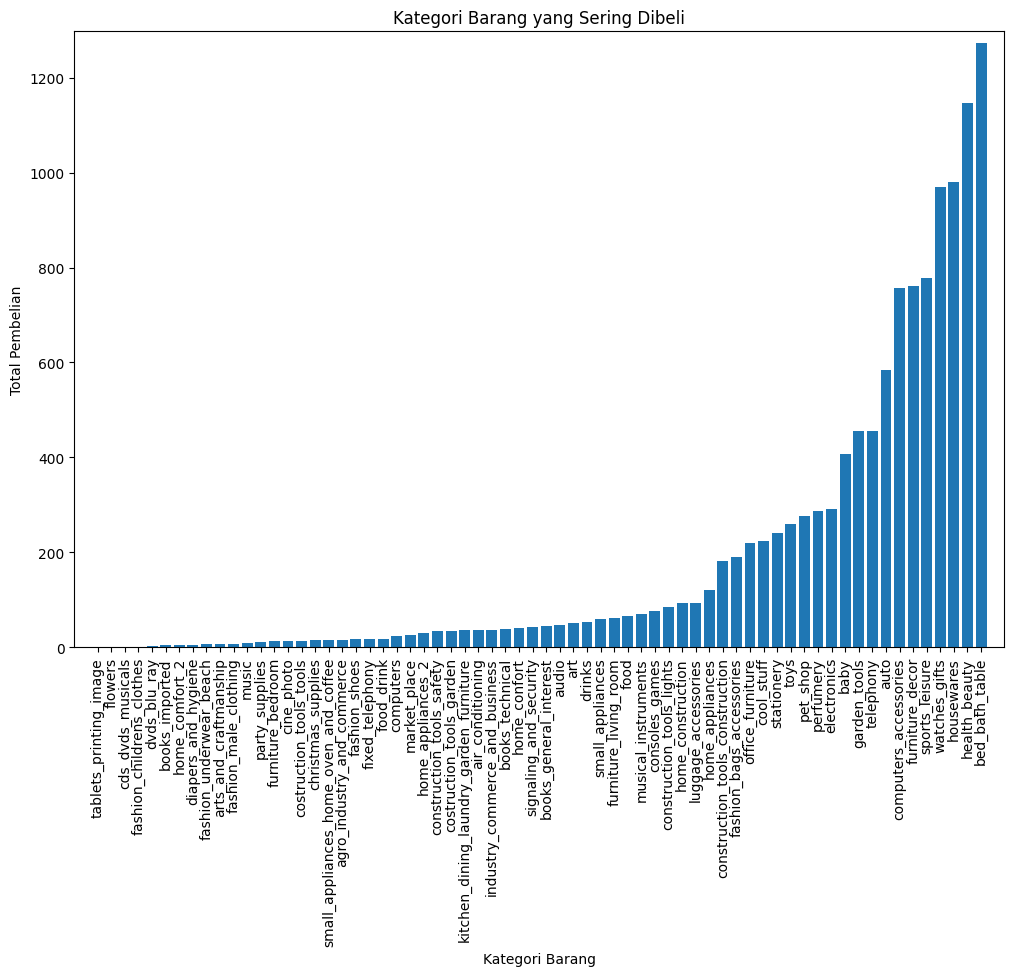

In [13]:
data = all_dataset.groupby(by=["product_category_name_english"]).agg(
    {
        "payment_sequential" : "sum"
    }
)
data = data.sort_values("payment_sequential")

fig = plt.figure(figsize=(12, 8))
x = data.index
y = data["payment_sequential"]

plt.bar(x, y)
plt.xlabel("Kategori Barang")
plt.ylabel("Total Pembelian")
plt.xticks(rotation=90)
plt.title("Kategori Barang yang Sering Dibeli")
plt.margins(.02)
plt.show()

**Pertanyaan 4**

**Jumlah order berdasarkan state**

Proses kali ini yaitu menganalisis seberapa tinggi atau seberapa banyak pelanggan dalam sebuah state melakukan order, proses tersebut kemudian divisualisasikan kedlam garfik batang

In [14]:
amount_order__by_state = all_dataset.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

print("Order by state")
print(amount_order__by_state)

Order by state
customer_state
SP    4112
RJ    1181
MG    1019
RS     412
PR     401
BA     388
SC     282
DF     210
ES     204
PE     198
GO     192
CE     139
PA     111
MT      99
MS      73
PB      67
PI      59
MA      57
RN      57
SE      48
AL      42
TO      33
RO      20
AM      15
AP       9
RR       4
AC       4
Name: order_id, dtype: int64


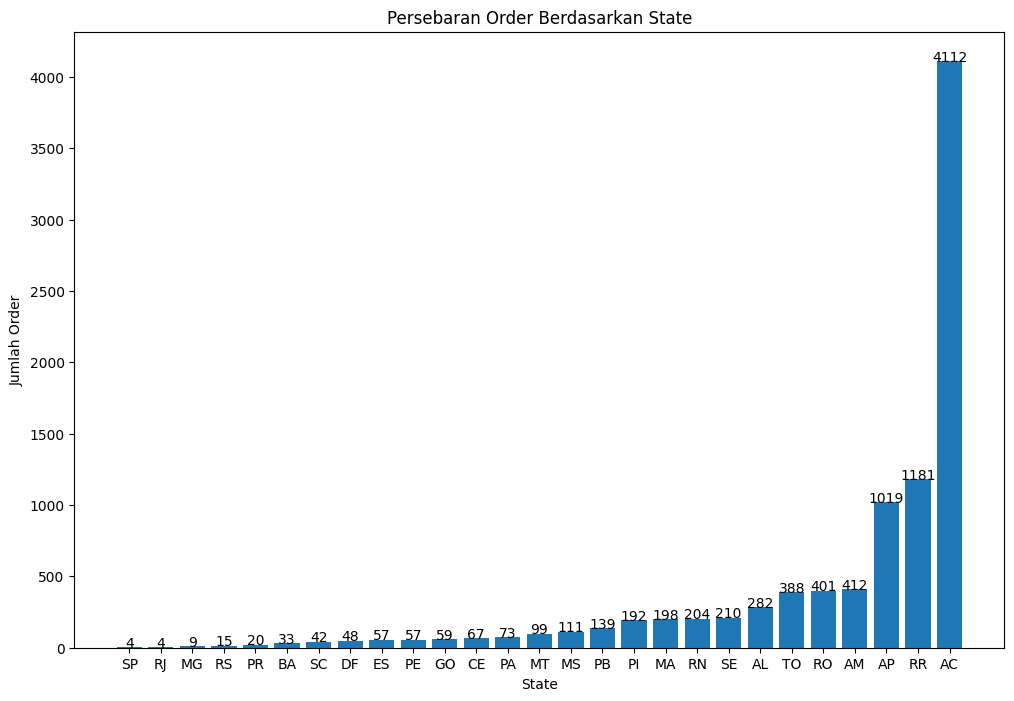

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
y = sorted(list(amount_order__by_state))
x = list(amount_order__by_state.index)

for i in range(len(x)):
  plt.text(i,y[i],y[i], ha = 'center')

plt.bar(x, y)
plt.title("Persebaran Order Berdasarkan State")
plt.xlabel("State")
plt.ylabel("Jumlah Order")
plt.show()

# Kesimpulan

Dari proses analisis di atas bisa saya simpulkan bahwa persebaran untuk setiap pelanggan tidak begitu merata terdapat gap yang cukup signifikan dan dengan penjualan produk yang tidak merata di mana kebanyakan minat komsumen berada pada kategori barang construction_tools_construction ,fashion_bags_accessories, office_furniture, cool_stuff, stationery, toys, pet_shop, perfumery, electronics, baby, garden_tools, telephony, auto, computers_accessories, furniture_decor, sports_leisure, watches_gifts, housewares, health_beauty, bed_bath_table. Terlihat pda grafik **Kategori Barang yang Sering Dibeli** kategori-kategori barang tersebut memiliki nilai repeat order yang cukup tinggi dibandingkan dengan kategori barang lainnya